## Phân cụm phân cấp
## Hierarchical clustering
source:
+ https://github.com/hhundiwala/hierarchical-clustering/blob/master/Hierarchical%20Clustering%20Explanation.ipynb 
+ https://viblo.asia/p/hierarchical-clustering-phan-cum-du-lieu-maGK7q2elj2

### 1. Thuật toán phân cụm phân cấp

Ý tưởng: 
+ Ban đầu mỗi điểm là một cụm riêng biệt. 
+ Thuật toán phân cụm phân cấp sẽ tạo ra các cụm lớn hơn bằng các sát nhập các cụm nhỏ hơn gần nhau nhất tại mỗi vòng lặp.
+ Các tiêu chí chọn hai cụm để sát nhập: Single-linkage (Phân cụm theo liên kết đơn), Complete-linkage (Phân cụm theo liên kết đầy đủ), Average-linkag, Centroid-linkage.

### 2. Cài đặt thuật toán bằng python

Cài đặt thư viện

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy as sp
from sklearn import datasets
from numpy import linalg as LA
from sklearn.metrics.pairwise import pairwise_distances
import sys

Tạo dữ liệu 2 chiều

In [2]:
data = np.array([[5,3],
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])

Hiển thị dữ liệu

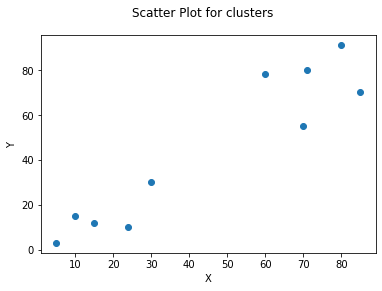

In [3]:
fig = plt.figure()
fig.suptitle('Scatter Plot for clusters')
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.scatter(data[:,0],data[:,1])

Ma trận khoảng cách: ma trận chứa khoảng cách giữa tất cả các điểm dữ liệu (tính bằng khoảng cách Euclide)

In [4]:
def hierarchical_clustering(data,linkage,no_of_clusters):  
    # Tính toán ma trận khoảng cách, chứa khoảng cách giữa tất cả các điểm.
    color = ['r','g','b','y','c','m','k','w','violet','lime']
    initial_distances = pairwise_distances(data,metric='euclidean')
    # Đưa đường chéo của ma trận khoảng cách là số rất lớn.
    np.fill_diagonal(initial_distances,sys.maxsize)
    # Tìm các phân cụm với ma trận khoảng cách tìm được.
    clusters = find_clusters(initial_distances,linkage) 
    # Hiển thị các phân cụm tìm được
    iteration_number = initial_distances.shape[0] - no_of_clusters
    clusters_to_plot = clusters[iteration_number]
    arr = np.unique(clusters_to_plot)
    
    indices_to_plot = []
    fig = plt.figure()
    fig.suptitle('Scatter Plot for clusters')
    ax = fig.add_subplot(1,1,1)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    for x in np.nditer(arr):
        indices_to_plot.append(np.where(clusters_to_plot==x))
    p=0
    
    print(clusters_to_plot)
    for i in range(0,len(indices_to_plot)):
        for j in np.nditer(indices_to_plot[i]):
               ax.scatter(data[j,0],data[j,1], c= color[p])
        p = p + 1
        
    plt.show()
    

Hàm tìm kiếm các phân cụm

In [5]:
def find_clusters(input,linkage):
    clusters = {}
    row_index = -1
    col_index = -1
    array = []
    

    for n in range(input.shape[0]):
        array.append(n)
        
    clusters[0] = array.copy()
    # Tìm kiếm giá trị nhỏ nhất trong ma trận.
    for k in range(1, input.shape[0]):
        min_val = sys.maxsize
        
        for i in range(0, input.shape[0]):
            for j in range(0, input.shape[1]):
                if(input[i][j]<=min_val):
                    min_val = input[i][j]
                    row_index = i
                    col_index = j
     # Tìm được giá trị nhỏ nhất, cập nhật ma trận khoảng cách.
     # Cập nhật ma trận khoảng cách từ cụm mới được tạo thành đến tất cả các điểm.
     # Thuật toán phân cụm theo liên kết đơn.
        if(linkage == "single" or linkage =="Single"):
            for i in range(0,input.shape[0]):
                if(i != col_index):
                    # Tính toán khoảng cách của mọi điểm dữ liệu từ cụm mới được hình thành và cập nhật ma trận.
                    temp = min(input[col_index][i],input[row_index][i])
                    # Cập nhật ma trận đối xứng.
                    input[col_index][i] = temp
                    input[i][col_index] = temp
        # Liên kết đầy đủ.
        elif(linkage=="Complete" or linkage == "complete"):
             for i in range(0,input.shape[0]):
                if(i != col_index and i!=row_index):
                    temp = min(input[col_index][i],input[row_index][i])
                    input[col_index][i] = temp
                    input[i][col_index] = temp
        # Liên kết trung bình.
        elif(linkage=="Average" or linkage == "average"):
             for i in range(0,input.shape[0]):
                if(i != col_index and i!=row_index):
                    temp = (input[col_index][i]+input[row_index][i])/2
                    input[col_index][i] = temp
                    input[i][col_index] = temp
        # Liên kết centroid.
        elif(linkage=="Centroid" or linkage =="centroid"):
            for i in range(0,input.shape[0]):
                if(i!=col_index and i!=row_index):
                    dist_centroid = cal_dist_from_centroid(i,row_index,col_index)
                    input[col_index][i] = dist_centroid
                    input[i][col_index] = dist_centroid
                   
        #set the rows and columns for the cluster with higher index i.e. the row index to infinity
        #Set input[row_index][for_all_i] = infinity
        #set input[for_all_i][row_index] = infinity
        for i in range (0,input.shape[0]):
            input[row_index][i] = sys.maxsize
            input[i][row_index] = sys.maxsize
            
        # Hình thành phân cụm trong từng bước.
        # k = 0 tất cả các điểm dữ liệu là một cụm
       
        minimum = min(row_index,col_index)
        maximum = max(row_index,col_index)
        for n in range(len(array)):
            if(array[n]==maximum):
                array[n] = minimum
        clusters[k] = array.copy()
        
    return clusters

Hiển thị kết quả

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


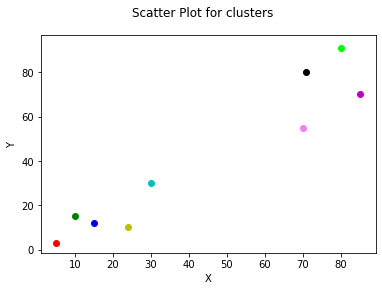

[0, 1, 1, 3, 4, 5, 6, 7, 8, 9]


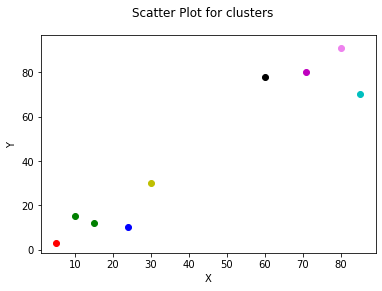

[0, 1, 1, 1, 4, 5, 6, 7, 8, 9]


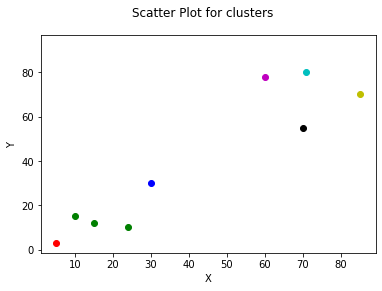

[0, 1, 1, 1, 4, 5, 6, 6, 8, 9]


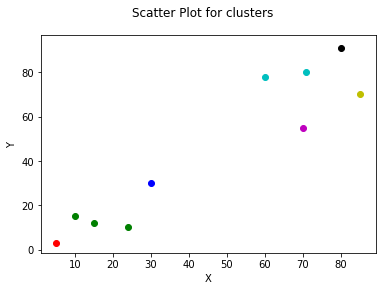

[0, 0, 0, 0, 4, 5, 6, 6, 8, 9]


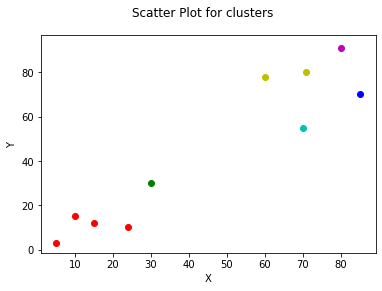

In [6]:
hierarchical_clustering(data,"single",10)
hierarchical_clustering(data,"single",9)
hierarchical_clustering(data,"single",8)
hierarchical_clustering(data,"single",7)
hierarchical_clustering(data,"single",6)

[0, 0, 0, 0, 4, 5, 6, 6, 8, 6]


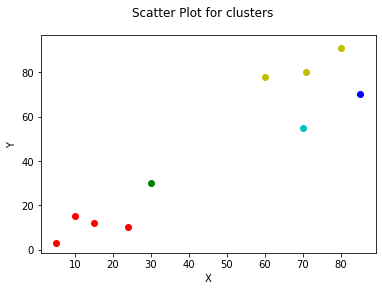

[0, 0, 0, 0, 4, 5, 5, 5, 8, 5]


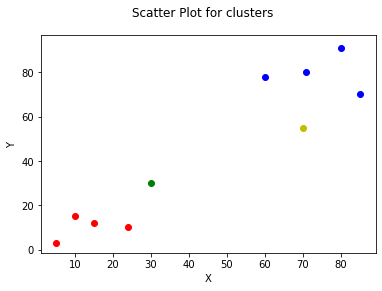

[0, 0, 0, 0, 0, 5, 5, 5, 8, 5]


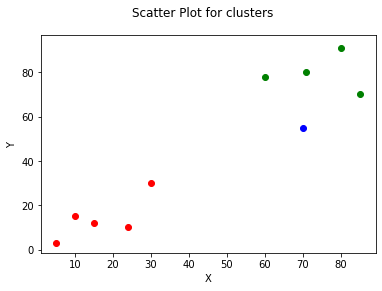

[0, 0, 0, 0, 0, 5, 5, 5, 5, 5]


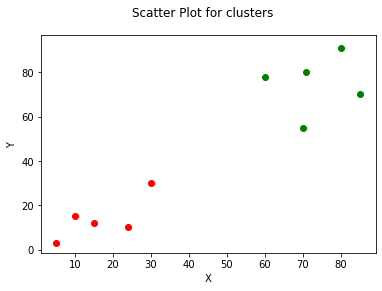

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


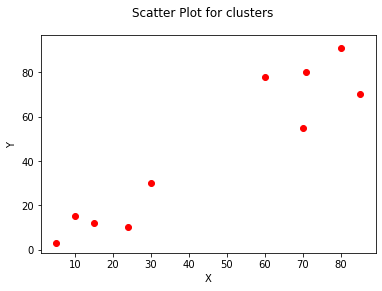

In [7]:
hierarchical_clustering(data,"single",5)
hierarchical_clustering(data,"single",4)
hierarchical_clustering(data,"single",3)
hierarchical_clustering(data,"single",2)
hierarchical_clustering(data,"single",1)

### 3. Sử dụng thư viện `scipy` trong python

In [8]:
import numpy as np
X = np.array([[5,3],
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])

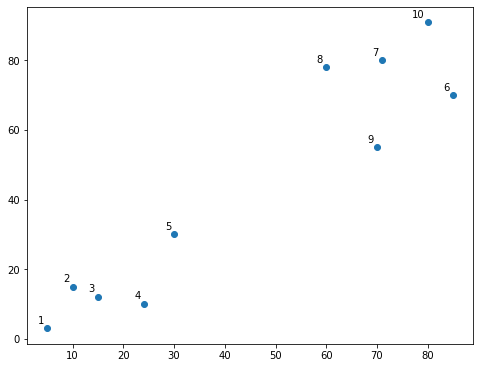

In [9]:
import matplotlib.pyplot as plt

labels = range(1, 11)
plt.figure(figsize=(8, 6))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0],X[:,1], label='True Position')

for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

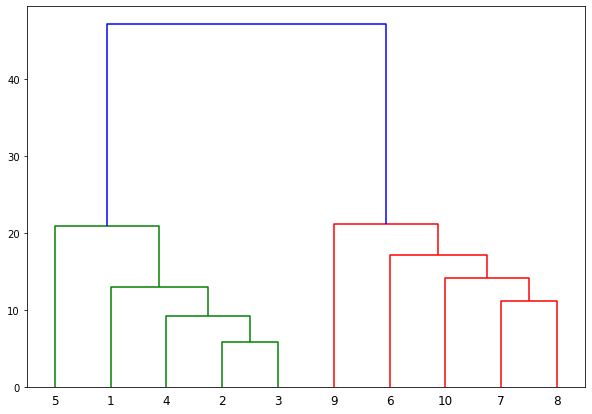

In [10]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X,'single')

labelList = range(1, 11)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()